# Usando H2O en vez de SCIKIT
Documentación oficial:
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html

Me he basado en este tutorial para completarlo:
https://github.com/Avkash/mldl/blob/master/orgs/h2o/guide/algo/xgboost/h2o_xgboost_houseprice_python.md


In [71]:
import h2o

# Inicio un servidor H2O con 4GB de memoria máxima
h2o.init(max_mem_size = "4G")

# Elimino los procesos que puedan estar corriendo
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,41 mins 41 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,"7 days, 8 hours and 1 minute"
H2O_cluster_name:,H2O_from_python_raul_e0tymj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.945 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [72]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import pandas as pd
import numpy as np
import os

# Importo los datos de entrenamiento
diamonds_train_data = h2o.import_file(os.path.realpath("input/train.csv"))


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [73]:
# Un resumen con los datos:
diamonds_train_data.describe()


Rows:40455
Cols:11




,id,carat,cut,color,clarity,depth,table,x,y,z,price
type,int,real,enum,enum,enum,real,real,real,real,real,int
mins,0.0,0.2,,,,43.0,43.0,0.0,0.0,0.0,326.0
mean,20227.0,0.7981206278581129,,,,61.74513162773459,57.451892225930074,5.731217402051668,5.735247806204424,3.5386854529724374,3938.1011247064653
maxs,40454.0,5.01,,,,79.0,79.0,10.74,58.9,31.8,18818.0
sigma,11678.4969067085,0.47487987597592796,,,,1.4342593500402872,2.2258932138467196,1.123363552113368,1.1528587047109045,0.7105791228151273,3992.645107711229
zeros,1,0,,,,0,0,6,5,16,0
missing,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.1,5363.0
1,1.0,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593.0
2,2.0,0.9,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534.0


In [74]:
# Nombres de las columnas
diamonds_train_data.col_names


['id',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'price']

In [75]:
# Divido los datos en datos de entrenamiento y validación
train, valid = diamonds_train_data.split_frame(ratios=[0.8])

# Separo features de groundtruth
groundtruth = "price"
features = diamonds_train_data.col_names

features.remove(groundtruth)
features.remove("id")

print(features)


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']


In [76]:
# NOTA: no he necesitado hacer LabelEncoder ni nada parecido para entrenar el modelo

In [148]:
# Crear el modelo
from h2o.estimators.xgboost import H2OXGBoostEstimator

param = {
      "ntrees" : 500
    , "max_depth" : 10
    , "learn_rate" : 0.01
    , "sample_rate" : 0.9
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
#    , "seed": 4241
    , "score_tree_interval": 50
}

#diamond_price_xgb = H2OXGBoostEstimator(**param)
diamond_price_xgb = H2OXGBoostEstimator()



In [146]:
# Entrenar el modelo
diamond_price_xgb.train(x = features, y = groundtruth, training_frame = train, validation_frame = valid)


xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [147]:
diamond_price_xgb


Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1601930967984_16


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 194620.01715351615
RMSE: 441.1575876639958
MAE: 253.50119576800475
RMSLE: 0.10037583820506814
Mean Residual Deviance: 194620.01715351615

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 334115.5887740174
RMSE: 578.0273252831715
MAE: 305.64410447179506
RMSLE: 0.11376814620290589
Mean Residual Deviance: 334115.5887740174

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-05 23:59:20,0.011 sec,0.0,5604.595194,3935.075754,3.141149e+07,5619.641830,3947.606587,3.158037e+07
1,,2020-10-05 23:59:20,0.158 sec,1.0,4002.006169,2757.164210,1.601605e+07,4002.685625,2759.763927,1.602149e+07
2,,2020-10-05 23:59:20,0.210 sec,2.0,2890.381042,1932.817044,8.354303e+06,2887.723546,1931.292954,8.338947e+06
3,,2020-10-05 23:59:20,0.261 sec,3.0,2126.846316,1361.820208,4.523475e+06,2120.842906,1357.466363,4.497975e+06
4,,2020-10-05 23:59:20,0.304 sec,4.0,1604.137722,975.771415,2.573258e+06,1599.997281,973.111195,2.559991e+06
5,,2020-10-05 23:59:20,0.347 sec,5.0,1258.328978,731.378175,1.583392e+06,1259.657696,731.142820,1.586738e+06
6,,2020-10-05 23:59:20,0.393 sec,6.0,1026.936853,578.893591,1.054599e+06,1031.919142,580.977374,1.064857e+06
7,,2020-10-05 23:59:20,0.440 sec,7.0,875.871675,486.243306,7.671512e+05,884.605286,490.399544,7.825265e+05
8,,2020-10-05 23:59:21,0.487 sec,8.0,779.207191,430.343936,6.071638e+05,794.379985,437.131399,6.310396e+05
9,,2020-10-05 23:59:21,0.543 sec,9.0,711.689547,392.418458,5.065020e+05,731.774324,402.164278,5.354937e+05



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,y,4.538609e+11,1.000000,0.457010
1,carat,4.239720e+11,0.934145,0.426914
2,clarity.SI2,1.813142e+10,0.039949,0.018257
3,clarity.I1,1.433743e+10,0.031590,0.014437
4,z,1.266515e+10,0.027905,0.012753
5,color.J,1.128008e+10,0.024854,0.011358
6,clarity.SI1,1.021420e+10,0.022505,0.010285
7,color.I,8.034929e+09,0.017704,0.008091
8,x,5.132262e+09,0.011308,0.005168
9,color.H,5.098006e+09,0.011233,0.005133



See the whole table with table.as_data_frame()


In [137]:
# Metricas
# - Rsquared
diamond_price_xgb.model_performance(valid=True).r2()


0.9791135677849668

In [138]:
# - RMSE
diamond_price_xgb.model_performance(valid=True).rmse()


578.0273252831715

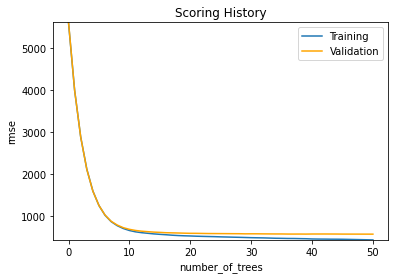

In [106]:
#: Plotting XGBoost Model for its AUC metric
diamond_price_xgb.plot(metric='AUTO')


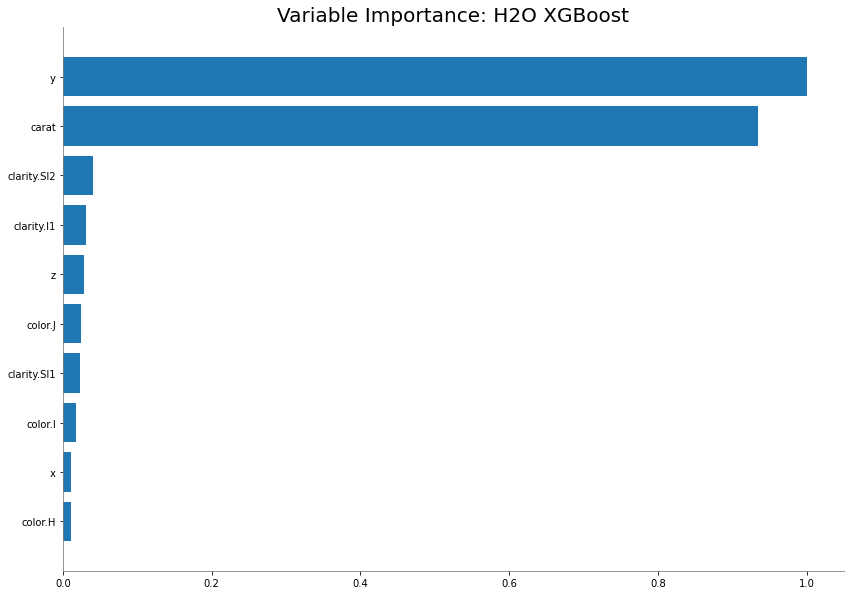

In [107]:
#: Genero un plot con las variables más importantes para el modelo XGBoost
diamond_price_xgb.varimp_plot()


In [108]:
# Histórico de predicciones y parámetros para H2O XGBoost
diamond_price_xgb.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-05 23:36:35,0.006 sec,0.0,5604.595194,3935.075754,3.141149e+07,5619.641830,3947.606587,3.158037e+07
1,,2020-10-05 23:36:35,0.152 sec,1.0,4002.006169,2757.164210,1.601605e+07,4002.685625,2759.763927,1.602149e+07
2,,2020-10-05 23:36:35,0.202 sec,2.0,2890.381042,1932.817044,8.354303e+06,2887.723546,1931.292954,8.338947e+06
3,,2020-10-05 23:36:36,0.252 sec,3.0,2126.846316,1361.820208,4.523475e+06,2120.842906,1357.466363,4.497975e+06
4,,2020-10-05 23:36:36,0.297 sec,4.0,1604.137722,975.771415,2.573258e+06,1599.997281,973.111195,2.559991e+06
5,,2020-10-05 23:36:36,0.345 sec,5.0,1258.328978,731.378175,1.583392e+06,1259.657696,731.142820,1.586738e+06
6,,2020-10-05 23:36:36,0.402 sec,6.0,1026.936853,578.893591,1.054599e+06,1031.919142,580.977374,1.064857e+06
7,,2020-10-05 23:36:36,0.451 sec,7.0,875.871675,486.243306,7.671512e+05,884.605286,490.399544,7.825265e+05
8,,2020-10-05 23:36:36,0.502 sec,8.0,779.207191,430.343936,6.071638e+05,794.379985,437.131399,6.310396e+05
9,,2020-10-05 23:36:36,0.573 sec,9.0,711.689547,392.418458,5.065020e+05,731.774324,402.164278,5.354937e+05


In [109]:
# PREDICCIONES
diamonds_predict_data = h2o.import_file(os.path.realpath("input/predict.csv"))

diamond_price_prediction = diamond_price_xgb.predict(diamonds_predict_data)

# NOTA: no he tenido que quitar las columnas de "id" ni de "price", parece que el solo ya sabe lo que predecir.

Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [110]:
# diamond_price_prediction es un objeto H20Frame
print(type(diamond_price_prediction))

# lo convierto a un Pandas DataFrame
diamond_price_prediction_df = h2o.as_list(diamond_price_prediction) 

print(type(diamond_price_prediction_df))

<class 'h2o.frame.H2OFrame'>
<class 'pandas.core.frame.DataFrame'>


In [116]:
# Lo exporto a un CSV para poder subirlo a Kaggle
diamonds_predict_data_df = h2o.as_list(diamonds_predict_data) 

# Convierto el set de datos de predicción a Pandas DataFrame
display(diamonds_predict_data_df["id"].head())
display(diamond_price_prediction_df["predict"].head())

# Formateo el fichero para subirlo a Kaggle
my_submission = pd.DataFrame({'id': diamonds_predict_data_df["id"], 'price': diamond_price_prediction_df["predict"]})
my_submission.to_csv('output/prediccion_h20.csv', index=False)
print(f"Exportados los datos a: output/prediccion_h20.csv")


0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

0     822.368042
1    6213.628906
2    6406.807129
3    1185.844116
4    3040.765381
Name: predict, dtype: float64

Exportados los datos a: output/prediccion_h20.csv
